In [1]:
import pandas as pd
import seaborn as sns
import glob
import numpy as np
import scipy.stats as stats
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import kurtosis, skew

In [2]:
sns.set_theme(style="darkgrid")

### Level 1 (Descriptive Statistics)

### Mean Median Mode

In [3]:
df = pd.read_csv('full_data.csv')

In [4]:
# set the 'Date' column as a date type
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df_numeric = df.drop(columns=['Date'])

In [6]:
results = []
for column in df_numeric.columns:
    col_mean = df_numeric[column].mean()
    col_median = df_numeric[column].median()
    col_mode = df_numeric[column].mode(dropna=True)
    
    results.append([column, col_mean, col_median, col_mode])

headers = ['Column', 'Mean', 'Median', 'Mode']
print (tabulate(results, headers=headers, floatfmt=" .2f"))

Column             Mean    Median  Mode
-------------  --------  --------  -----------------------------------
Alky pH 4.5      202.70    202.70  0    202.70233
                                   Name: Alky pH 4.5, dtype: float64
Chloride Ion     290.16    247.22  0    290.161737
                                   Name: Chloride Ion, dtype: float64
Orthophospht       0.40      0.40  0    0.395029
                                   Name: Orthophospht, dtype: float64
Sulphate SO4     287.02    228.04  0    287.0181
                                   Name: Sulphate SO4, dtype: float64
Ammonia(N)         1.55      1.49  0    1.550881
                                   Name: Ammonia(N), dtype: float64
TurbidityNTU      10.14     10.14  0    10.138017
                                   Name: TurbidityNTU, dtype: float64
Temp Water        12.88     13.07  0    12.882616
                                   Name: Temp Water, dtype: float64
Cond @ 25C      1115.13   1115.13  0    1115.134319
    

### Skewness 

array([[<AxesSubplot: title={'center': 'Alky pH 4.5'}>,
        <AxesSubplot: title={'center': 'Chloride Ion'}>,
        <AxesSubplot: title={'center': 'Orthophospht'}>,
        <AxesSubplot: title={'center': 'Sulphate SO4'}>],
       [<AxesSubplot: title={'center': 'Ammonia(N)'}>,
        <AxesSubplot: title={'center': 'TurbidityNTU'}>,
        <AxesSubplot: title={'center': 'Temp Water'}>,
        <AxesSubplot: title={'center': 'Cond @ 25C'}>],
       [<AxesSubplot: title={'center': 'Oxygen Diss'}>,
        <AxesSubplot: title={'center': 'pH'}>,
        <AxesSubplot: title={'center': 'BOD ATU'}>,
        <AxesSubplot: title={'center': 'COD as O2'}>],
       [<AxesSubplot: title={'center': 'Nitrate-N'}>,
        <AxesSubplot: title={'center': 'Nitrite-N'}>,
        <AxesSubplot: title={'center': 'Hardness'}>,
        <AxesSubplot: title={'center': 'SALinsitu'}>],
       [<AxesSubplot: title={'center': 'ALL_RUNS'}>,
        <AxesSubplot: title={'center': 'Average_count'}>,
        <Axe

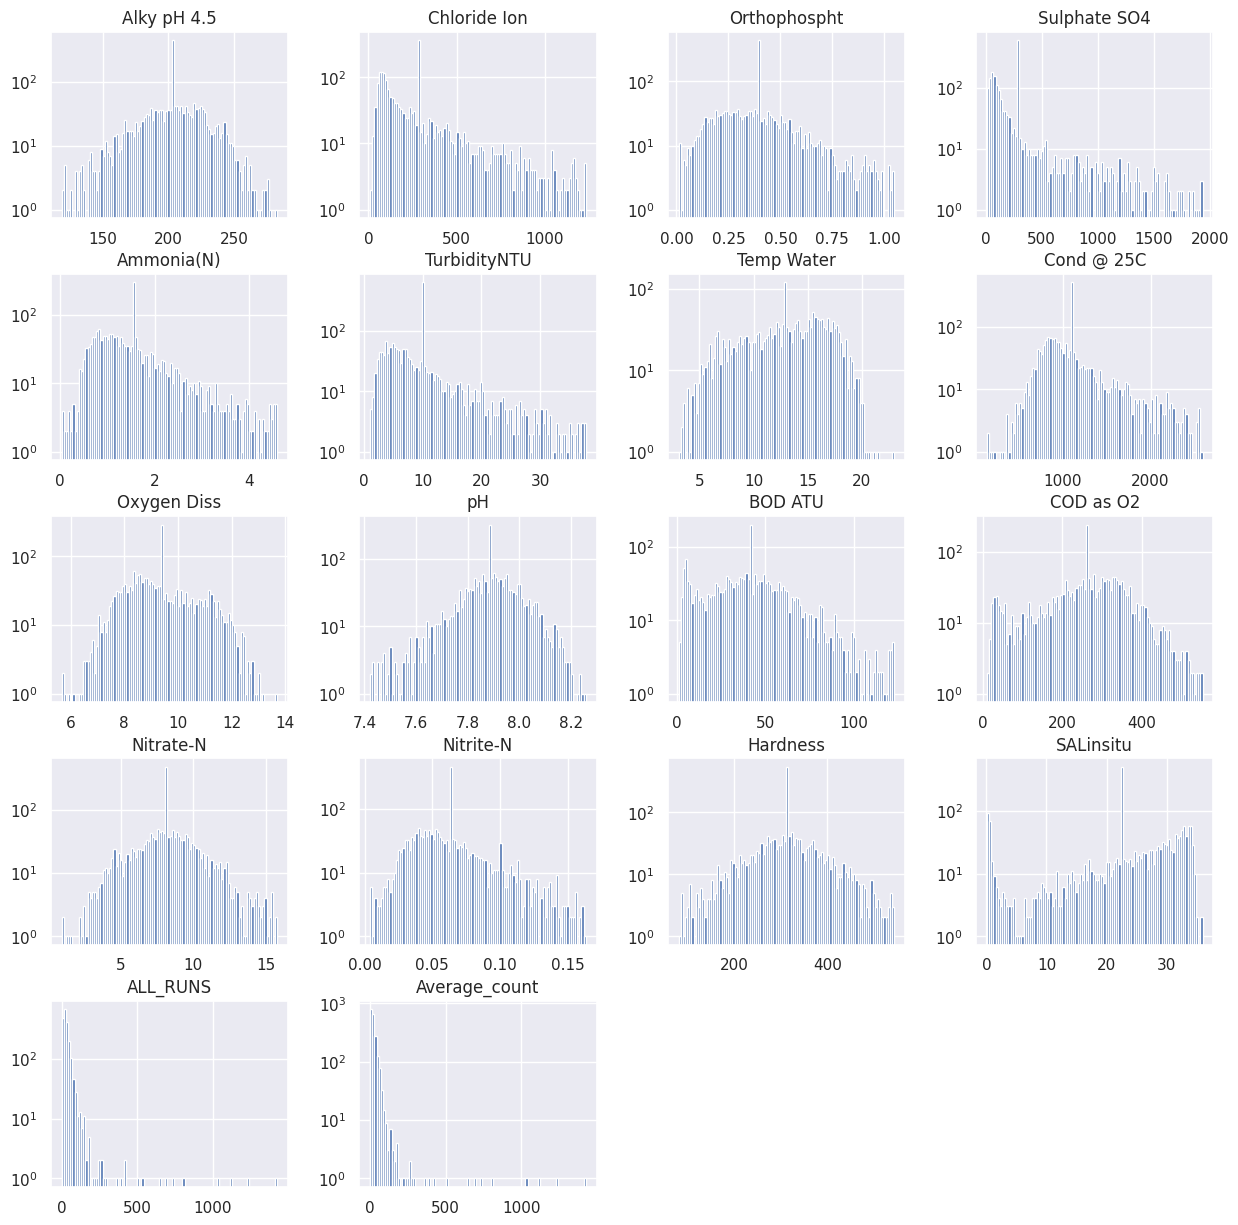

In [7]:
df_numeric.hist(figsize=(15,15), bins=100, log=True) # histogram plot 

### Curtosis

In [8]:
from scipy.stats import kurtosis, skew

# # calculate skewness and kurtosis of each column

curtosis = kurtosis(df_numeric, axis = 0)
skew = skew(df_numeric, axis = 0)

# create a new DataFrame with the results
results_df = pd.DataFrame({'Column': df_numeric.columns, 'Skewness': skew, 'Kurtosis': curtosis})

# print the results
print(results_df)
results_df.to_csv('skew_curt.csv')

           Column   Skewness    Kurtosis
0     Alky pH 4.5  -0.296382    0.717559
1    Chloride Ion   1.592951    2.303293
2    Orthophospht   0.812006    1.001380
3    Sulphate SO4   2.515542    6.723463
4      Ammonia(N)   1.275440    1.769378
5    TurbidityNTU   1.721279    3.551423
6      Temp Water  -0.337466   -0.736938
7      Cond @ 25C   1.368787    2.489881
8     Oxygen Diss   0.377249   -0.234108
9              pH  -0.491226    1.262196
10        BOD ATU   0.589315    0.369556
11      COD as O2  -0.273055   -0.030889
12      Nitrate-N   0.224779    1.081491
13      Nitrite-N   0.983609    1.330658
14       Hardness   0.017643    1.006145
15      SALinsitu  -1.033413    0.324278
16       ALL_RUNS  11.795588  177.743517
17  Average_count  12.867977  203.908132


### Range Variance and Standard Deviation

In [9]:
# Assuming that df_numeric is your pandas DataFrame containing only numeric values

# Calculate range
range_values = np.ptp(df_numeric, axis=0)

# Calculate variance
variance_values = np.var(df_numeric, axis=0)

# Calculate standard deviation
std_dev_values = np.std(df_numeric, axis=0)

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    "Range": range_values,
    "Variance": variance_values,
    "Standard Deviation": std_dev_values
}, index=df_numeric.columns)

# Print the results in a tabular form
result_df.to_csv('rang_var.csv')


In [10]:
#Range
range_values = np.ptp(df_numeric, axis=0)

#variance
variance_values = np.var(df_numeric,axis=0)
variance_values

#standard deviation
std_dev_values = np.std(df_numeric,axis=0)
std_dev_values 


# Print table of column names and their range values
print("{:<15}{}".format("Column Name", "Range"))
print("-" * 25)
for col, r in zip(df_numeric.columns, range_values):
    print("{:<15}{:.4f}".format(col, r))


Column Name    Range
-------------------------
Alky pH 4.5    165.0427
Chloride Ion   1223.2980
Orthophospht   1.0372
Sulphate SO4   1926.7500
Ammonia(N)     4.5609
TurbidityNTU   36.8000
Temp Water     19.9313
Cond @ 25C     2460.8253
Oxygen Diss    8.0300
pH             0.8354
BOD ATU        121.6860
COD as O2      542.2143
Nitrate-N      14.9100
Nitrite-N      0.1594
Hardness       463.1000
SALinsitu      35.9167
ALL_RUNS       1426.1667
Average_count  1426.1667


In [11]:
variance_values = np.var(df_numeric,axis=0)
variance_values

Alky pH 4.5         635.122292
Chloride Ion      62398.554573
Orthophospht          0.036080
Sulphate SO4     109725.317175
Ammonia(N)            0.686969
TurbidityNTU         41.636256
Temp Water           14.644551
Cond @ 25C       138817.291087
Oxygen Diss           1.665717
pH                    0.015358
BOD ATU             593.781668
COD as O2         11312.317827
Nitrate-N             4.830706
Nitrite-N             0.000745
Hardness           5547.899802
SALinsitu            92.722356
ALL_RUNS           5029.102317
Average_count      4741.705991
dtype: float64

In [12]:
std_dev_values = np.std(df_numeric,axis=0)
std_dev_values 

Alky pH 4.5       25.201633
Chloride Ion     249.797027
Orthophospht       0.189946
Sulphate SO4     331.248120
Ammonia(N)         0.828836
TurbidityNTU       6.452616
Temp Water         3.826820
Cond @ 25C       372.581925
Oxygen Diss        1.290626
pH                 0.123927
BOD ATU           24.367636
COD as O2        106.359381
Nitrate-N          2.197887
Nitrite-N          0.027298
Hardness          74.484225
SALinsitu          9.629245
ALL_RUNS          70.916164
Average_count     68.860046
dtype: float64

In [13]:
#create a column year 
df["year"] = df["Date"].dt.year

In [14]:
# Create separate DataFrames for each season
spring_df = df[(df['Date'].dt.month >= 3) & (df['Date'].dt.month <= 5)]
summer_df = df[(df['Date'].dt.month >= 6) & (df['Date'].dt.month <= 8)]
fall_df = df[(df['Date'].dt.month >= 9) & (df['Date'].dt.month <= 11)]
winter_df = df[(df['Date'].dt.month == 12) | (df['Date'].dt.month <= 2)]



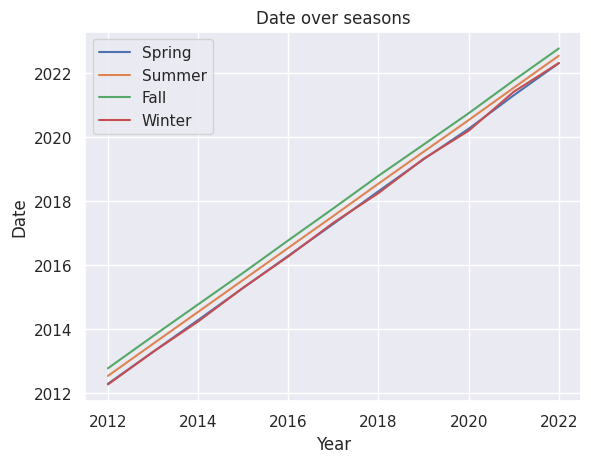

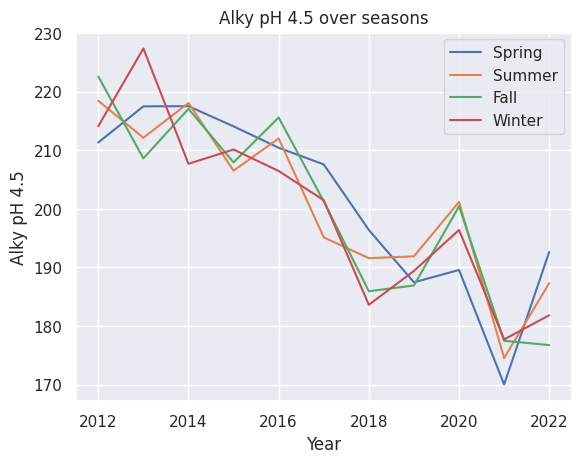

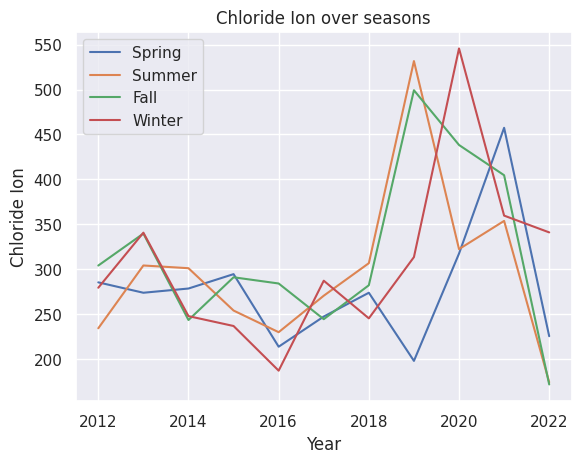

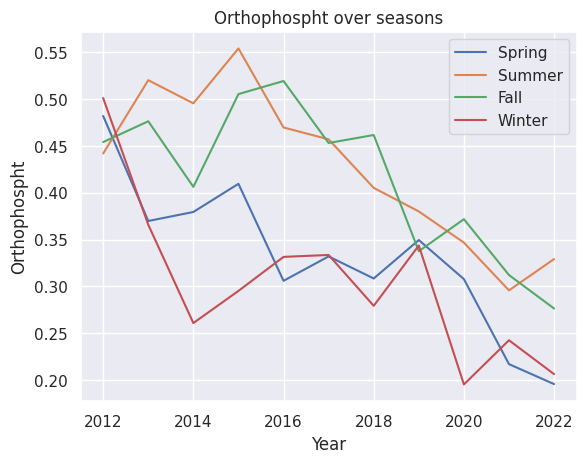

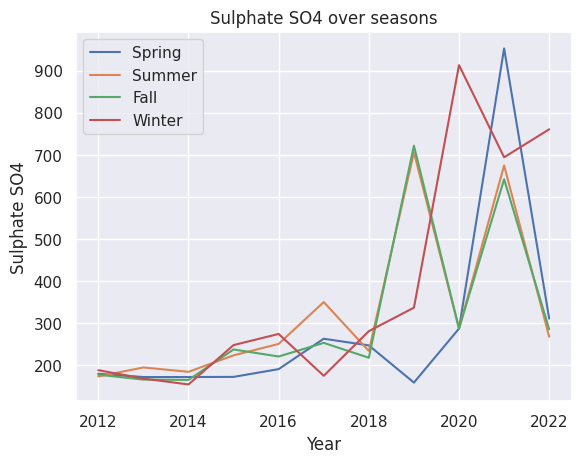

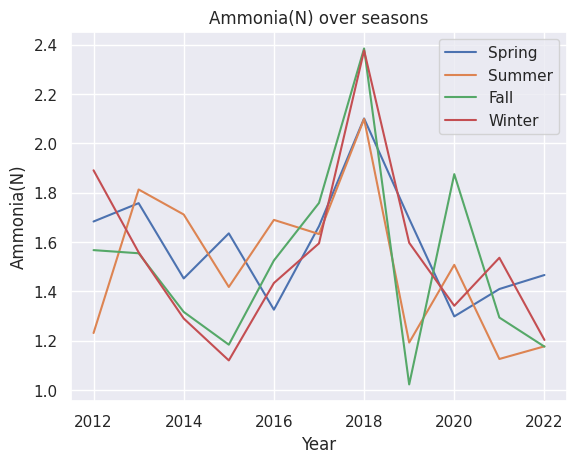

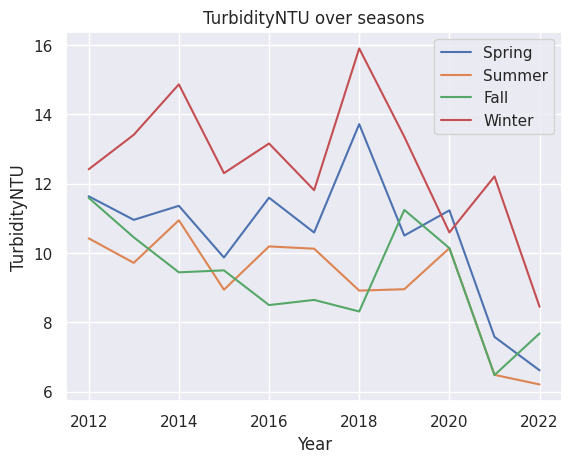

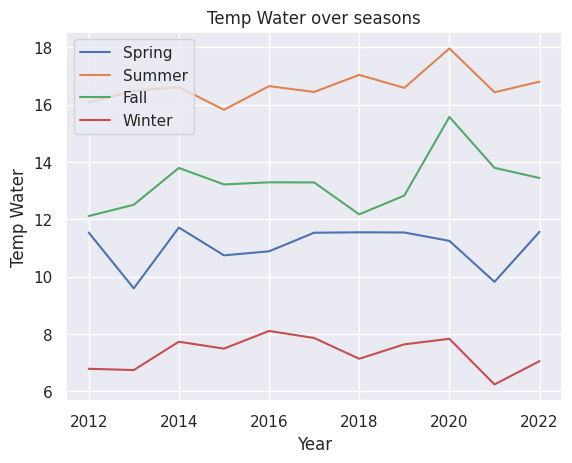

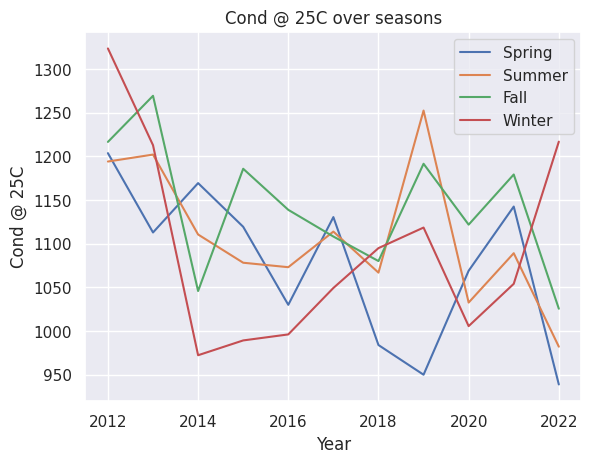

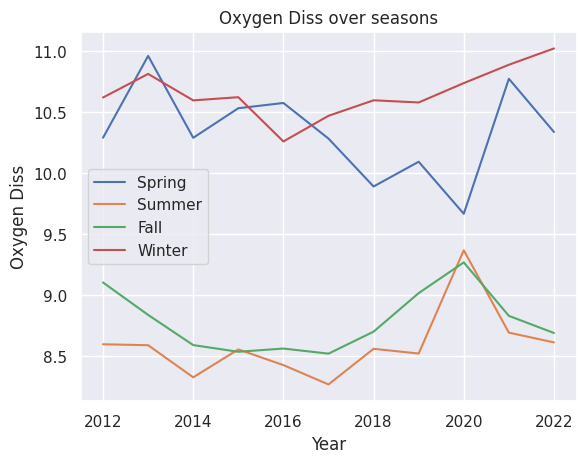

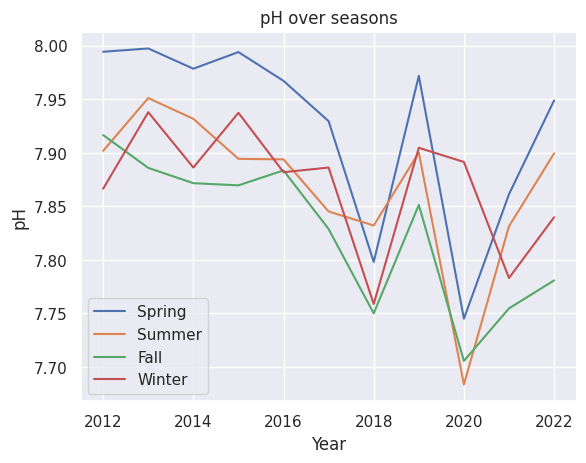

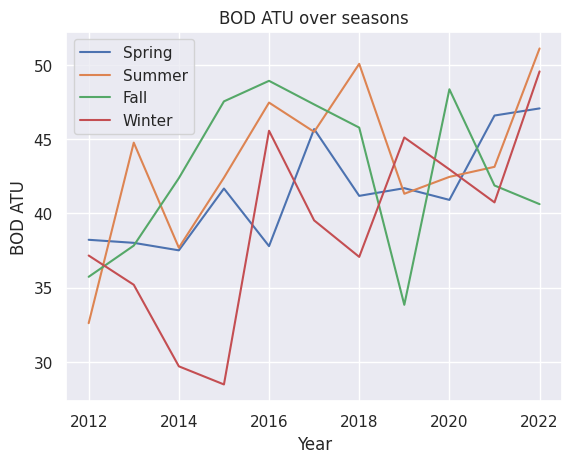

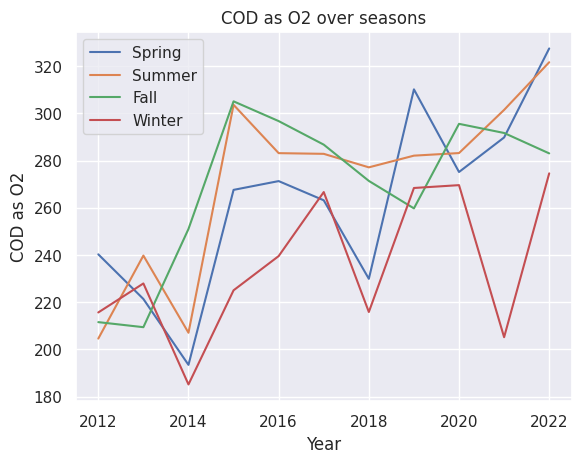

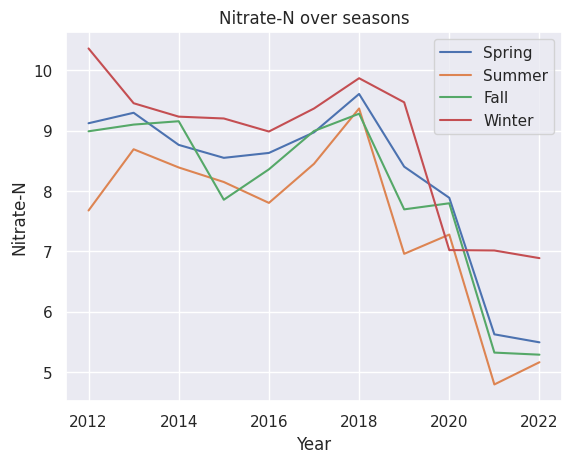

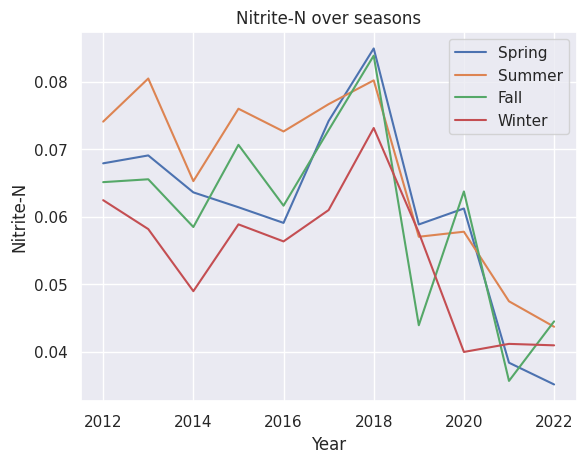

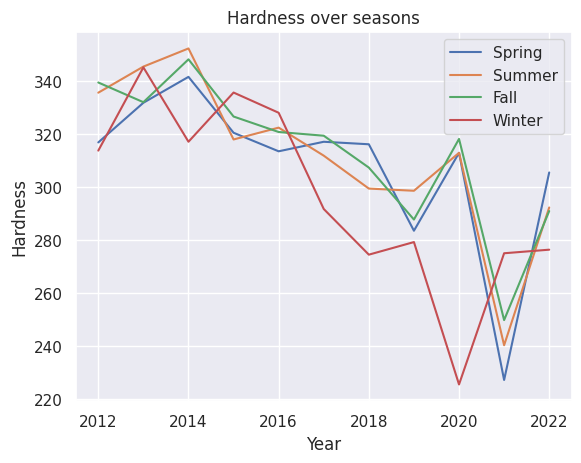

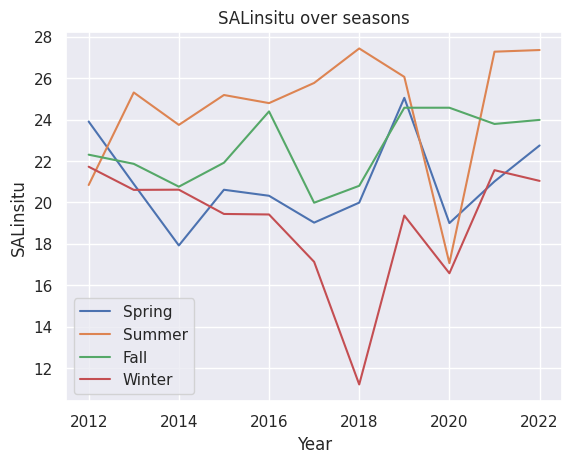

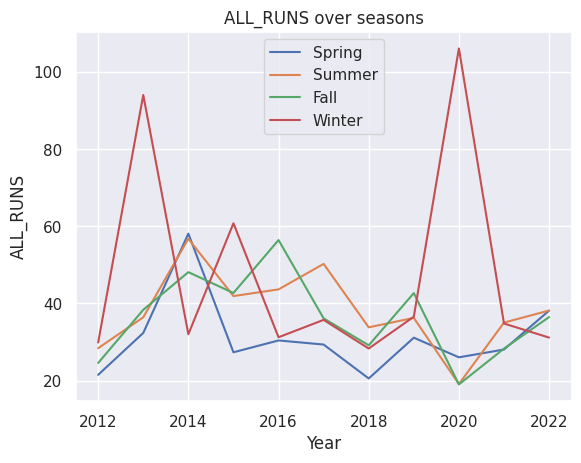

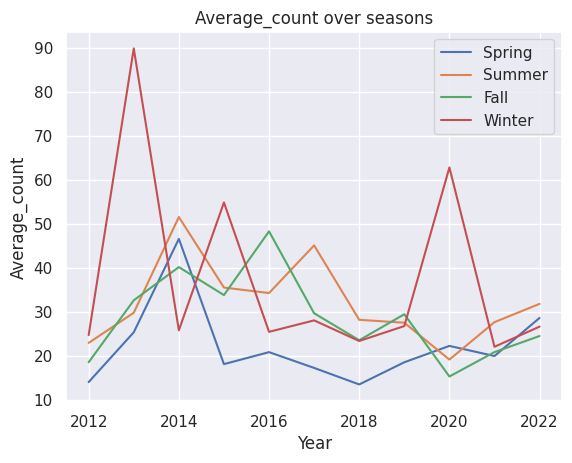

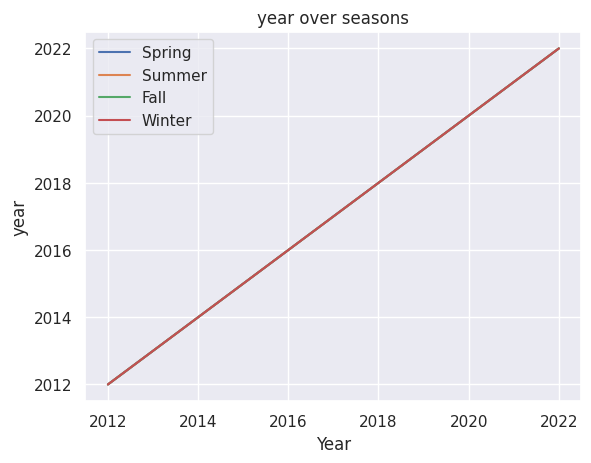

In [15]:
# Group the data by season
spring_grouped = spring_df.groupby(spring_df['Date'].dt.year)
summer_grouped = summer_df.groupby(summer_df['Date'].dt.year)
fall_grouped = fall_df.groupby(fall_df['Date'].dt.year)
winter_grouped = winter_df.groupby(winter_df['Date'].dt.year)

# Plot each column over each season
for col in df.columns:
    fig, ax = plt.subplots()
    ax.plot(spring_grouped[col].mean(), label='Spring')
    ax.plot(summer_grouped[col].mean(), label='Summer')
    ax.plot(fall_grouped[col].mean(), label='Fall')
    ax.plot(winter_grouped[col].mean(), label='Winter')
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.set_title(f'{col} over seasons')
    plt.show()

##### Spring measure of disersion

In [16]:
spring_df_dispersion = spring_df.drop(columns=['Date'])

results = []
for column in spring_df_dispersion.columns:
    col_mean = spring_df_dispersion[column].mean()
    col_median = spring_df_dispersion[column].median()
    col_mode = spring_df_dispersion[column].mode(dropna=True)
    
    results.append([column, col_mean, col_median, col_mode])

headers = ['Column', 'Mean', 'Median', 'Mode']
print (tabulate(results, headers=headers, floatfmt=" .2f"))

Column             Mean    Median  Mode
-------------  --------  --------  -----------------------------------
Alky pH 4.5      205.33    202.70  0    202.70233
                                   Name: Alky pH 4.5, dtype: float64
Chloride Ion     265.74    205.49  0    290.161737
                                   Name: Chloride Ion, dtype: float64
Orthophospht       0.35      0.36  0    0.395029
                                   Name: Orthophospht, dtype: float64
Sulphate SO4     235.68    149.15  0    287.0181
                                   Name: Sulphate SO4, dtype: float64
Ammonia(N)         1.62      1.55  0    1.550881
                                   Name: Ammonia(N), dtype: float64
TurbidityNTU      10.73     10.14  0    10.138017
                                   Name: TurbidityNTU, dtype: float64
Temp Water        11.09     11.22  0    12.882616
                                   Name: Temp Water, dtype: float64
Cond @ 25C      1081.13   1078.43  0    1115.134319
    

#### Summer measure of dispersion

In [17]:
summer_df_dispersion = summer_df.drop(columns=['Date'])

results = []
for column in summer_df_dispersion.columns:
    col_mean = summer_df_dispersion[column].mean()
    col_median = summer_df_dispersion[column].median()
    col_mode = summer_df_dispersion[column].mode(dropna=True)
    
    results.append([column, col_mean, col_median, col_mode])

headers = ['Column', 'Mean', 'Median', 'Mode']
print (tabulate(results, headers=headers, floatfmt=" .2f"))

Column             Mean    Median      Mode
-------------  --------  --------  --------
Alky pH 4.5      201.35    202.70    202.70
Chloride Ion     295.94    268.94    290.16
Orthophospht       0.44      0.40      0.40
Sulphate SO4     317.98    287.02    287.02
Ammonia(N)         1.52      1.38      1.55
TurbidityNTU       9.18      9.40     10.14
Temp Water        16.52     16.56     12.88
Cond @ 25C      1116.52   1115.13   1115.13
Oxygen Diss        8.53      8.54      9.37
pH                 7.88      7.89      7.89
BOD ATU           43.51     41.81     41.81
COD as O2        269.39    268.15    259.46
Nitrate-N          7.61      8.05      8.19
Nitrite-N          0.07      0.06      0.06
Hardness         313.21    313.03    313.03
SALinsitu         25.13     27.66     22.52
ALL_RUNS          39.54     30.19      2.00
Average_count     33.05     23.76      2.00
year            2016.63   2016.50   2012.00


#### winter measure of dispersion

In [18]:
winter_df_dispersion = winter_df.drop(columns=['Date'])

results = []
for column in winter_df_dispersion.columns:
    col_mean = winter_df_dispersion[column].mean()
    col_median = winter_df_dispersion[column].median()
    col_mode = winter_df_dispersion[column].mode(dropna=True)
    
    results.append([column, col_mean, col_median, col_mode])

headers = ['Column', 'Mean', 'Median', 'Mode']
print (tabulate(results, headers=headers, floatfmt=" .2f"))

Column             Mean    Median      Mode
-------------  --------  --------  --------
Alky pH 4.5      203.23    202.70    202.70
Chloride Ion     285.67    254.94    290.16
Orthophospht       0.33      0.32      0.40
Sulphate SO4     304.26    225.60    287.02
Ammonia(N)         1.57      1.55      1.55
TurbidityNTU      12.85     10.14     10.14
Temp Water         7.30      6.85     12.88
Cond @ 25C      1114.03   1115.13   1115.13
Oxygen Diss       10.64     10.69      9.37
pH                 7.87      7.89      7.89
BOD ATU           38.31     39.00     41.81
COD as O2        230.58    251.33    259.46
Nitrate-N          9.12      8.61      8.19
Nitrite-N          0.06      0.05      0.06
Hardness         306.60    313.03    313.03
SALinsitu         19.34     22.52     22.52
ALL_RUNS          43.88     26.50      2.00
Average_count     36.86     19.56      2.00
year            2016.02   2016.00   2012.00


#### Fall measure of dispersion 

In [19]:
fall_df_dispersion = fall_df.drop(columns=['Date'])

results = []
for column in fall_df_dispersion.columns:
    col_mean = fall_df_dispersion[column].mean()
    col_median = fall_df_dispersion[column].median()
    col_mode = fall_df_dispersion[column].mode(dropna=True)
    
    results.append([column, col_mean, col_median, col_mode])

headers = ['Column', 'Mean', 'Median', 'Mode']
print (tabulate(results, headers=headers, floatfmt=" .2f"))

Column             Mean    Median      Mode
-------------  --------  --------  --------
Alky pH 4.5      201.59    202.70    202.70
Chloride Ion     308.49    267.50    290.16
Orthophospht       0.43      0.40      0.40
Sulphate SO4     289.06    270.46    287.02
Ammonia(N)         1.52      1.39      1.55
TurbidityNTU       9.32     10.10     10.14
Temp Water        13.08     13.03     12.88
Cond @ 25C      1146.03   1115.13   1115.13
Oxygen Diss        8.76      8.81      9.37
pH                 7.84      7.87      7.89
BOD ATU           42.40     41.81     41.81
COD as O2        265.05    263.85    259.46
Nitrate-N          8.14      8.19      8.19
Nitrite-N          0.06      0.06      0.06
Hardness         315.39    313.03    313.03
SALinsitu         22.44     22.52     22.52
ALL_RUNS          37.62     24.79      1.00
Average_count     29.79     18.00      1.00
year            2016.48   2016.00   2012.00


In [20]:
grp_year = df.groupby("year")

In [21]:
grp_year_avg = grp_year["Average_count"].agg("sum")

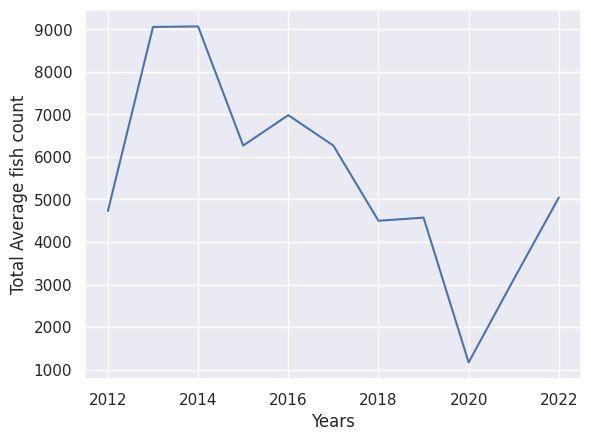

In [22]:
grp_year_avg.plot()
plt.ylabel("Total Average fish count")
plt.xlabel("Years")
plt.show()